# Recipes and Ratings

**Name(s)**: Anna Doan, Jiya Makhija

**Website Link**: https://jiya-makhija.github.io/recipes-and-ratings/


In [93]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.express as px
pd.options.plotting.backend = 'plotly'

import plotly.graph_objects as go

#from dsc80_utils import * 

## Step 1: Introduction

In [2]:
# TODO

Nowadays, online recipes serve as an essential resource for home cooks and culinary enthusiasts. Understanding the factors that contribute to a recipe's success can provide valuable insights for both individuals seeking high-quality recipes and platforms aiming to enhance user engagement. This project explores a dataset of recipes and user interactions to examine the characteristics associated with highly-rated recipes. Specifically, we aim to answer the question: **What factors contribute to a highly-rated recipe?**

To investigate this question, we analyze two datasets. The first dataset, `RAW_recipes.csv`, contains 83,782 unique recipes, each with attributes such as preparation time, ingredients, and nutritional information. The second dataset, `interactions.csv`, includes 731,927 user interactions in the form of ratings and reviews.

Several key variables from these datasets are neccessary for our analysis. From `RAW_recipes.csv`, the `ingredients` column lists the components used in each recipe, while `n_ingredients` quantifies the total number of ingredients. Additionally, the `minutes` column specifies the time required to prepare a dish, providing insight into the role of convenience in recipe popularity. From `interactions.csv`, the `rating` column captures user evaluations of a recipe, serving as our primary measure of recipe success.

A key aspect of our analysis involves testing whether the number of ingredients in a recipe influences its rating. Specifically, we examine whether recipes with 9 or fewer ingredients receive different average ratings than those with more than 9 ingredients. Our hypothesis framework is as follows:

**Null Hypothesis (H₀):** The average rating of recipes with 9 or fewer ingredients is the same as that of recipes with more than 9 ingredients. 


**Alternative Hypothesis (H₁):** The average rating of recipes with 9 or fewer ingredients is different from that of recipes with more than 9 ingredients.

By analyzing these factors, this project aims to identify trends in recipe ratings, offering insights into how the number of ingredients, preparation time, and other characteristics influence user preferences. Such findings could benefit both culinary content creators seeking to optimize recipe appeal and individuals searching for well-rated recipes that align with their needs and constraints.

## Step 2: Data Cleaning and Exploratory Data Analysis

In [3]:
# Jiya's Desktop
# recipes = pd.read_csv("/Applications/ucsd/dsc80-2025-wi/projects/project04/RAW_recipes.csv")
# interactions = pd.read_csv("/Applications/ucsd/dsc80-2025-wi/projects/project04/interactions.csv")

# Anna's Desktop
recipes_fp = Path('RAW_recipes.csv')
recipes = pd.read_csv(recipes_fp)

interactions_fp = Path('interactions.csv')
interactions = pd.read_csv(interactions_fp)


In [4]:
recipes[["calories", "total_fat", "sugar", "sodium", "protein", "saturated_fat", "carbohydrates"]] = recipes["nutrition"].str.extract(r"\[(.*)\]").iloc[:, 0].str.split(",", expand=True)
recipes[["calories", "total_fat", "sugar", "sodium", "protein", "saturated_fat", "carbohydrates"]] = recipes[["calories", "total_fat", "sugar", "sodium", "protein", "saturated_fat", "carbohydrates"]].astype(float)
recipes.drop(columns=["nutrition"], inplace=True)

recipes.head()

name      id  minutes  contributor_id  \
0  1 brownies in the world    best ever  333281       40          985201   
1    1 in canada chocolate chip cookies  453467       45         1848091   
2                412 broccoli casserole  306168       40           50969   
3                millionaire pound cake  286009      120          461724   
4                         2000 meatloaf  475785       90         2202916   

    submitted                                               tags  n_steps  \
0  2008-10-27  ['60-minutes-or-less', 'time-to-make', 'course...       10   
1  2011-04-11  ['60-minutes-or-less', 'time-to-make', 'cuisin...       12   
2  2008-05-30  ['60-minutes-or-less', 'time-to-make', 'course...        6   
3  2008-02-12  ['time-to-make', 'course', 'cuisine', 'prepara...        7   
4  2012-03-06  ['time-to-make', 'course', 'main-ingredient', ...       17   

                                               steps  \
0  ['heat the oven to 350f and arrange the rack i...   
1  ['pre-heat oven the 350 degrees f', 'in a mixi...   
2  ['preheat oven to 350 degrees', 'spray a 2 qua...   
3  ['freheat the oven to 300 degrees', 'grease a ...   
4  ['pan fry bacon , and set aside on a paper tow...   

                                         description  \
0  these are the most; chocolatey, moist, rich, d...   
1  this is the recipe that we use at my school ca...   
2  since there are already 411 recipes for brocco...   
3  why a millionaire pound cake?  because it's su...   
4  ready, set, cook! special edition contest entr...   

                                         ingredients  n_ingredients  calories  \
0  ['bittersweet chocolate', 'unsalted butter', '...              9     138.4   
1  ['white sugar', 'brown sugar', 'salt', 'margar...             11     595.1   
2  ['frozen broccoli cuts', 'cream of chicken sou...              9     194.8   
3  ['butter', 'sugar', 'eggs', 'all-purpose flour...              7     878.3   
4  ['meatloaf mixture', 'unsmoked bacon', 'goat c...             13     267.0   

   total_fat  sugar  sodium  protein  saturated_fat  carbohydrates  
0       10.0   50.0     3.0      3.0           19.0            6.0  
1       46.0  211.0    22.0     13.0           51.0           26.0  
2       20.0    6.0    32.0     22.0           36.0            3.0  
3       63.0  326.0    13.0     20.0          123.0           39.0  
4       30.0   12.0    12.0     29.0           48.0            2.0

In [5]:
interactions.head()

user_id  recipe_id        date  rating  \
0     1293707      40893  2011-12-21       5   
1      126440      85009  2010-02-27       5   
2       57222      85009  2011-10-01       5   
3      124416     120345  2011-08-06       0   
4  2000192946     120345  2015-05-10       2   

                                              review  
0  So simple, so delicious! Great for chilly fall...  
1  I made the Mexican topping and took it to bunk...  
2  Made the cheddar bacon topping, adding a sprin...  
3  Just an observation, so I will not rate.  I fo...  
4  This recipe was OVERLY too sweet.  I would sta...

In [6]:
merged_df = recipes.merge(interactions, left_on="id", right_on="recipe_id", how="left")

In [7]:
merged_df

name      id  minutes  \
0               1 brownies in the world    best ever  333281       40   
1                 1 in canada chocolate chip cookies  453467       45   
2                             412 broccoli casserole  306168       40   
3                             412 broccoli casserole  306168       40   
4                             412 broccoli casserole  306168       40   
...                                              ...     ...      ...   
234424                     zydeco ya ya deviled eggs  308080       40   
234425        cookies by design   cookies on a stick  298512       29   
234426  cookies by design   sugar shortbread cookies  298509       20   
234427  cookies by design   sugar shortbread cookies  298509       20   
234428  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id   submitted  \
0               985201  2008-10-27   
1              1848091  2011-04-11   
2                50969  2008-05-30   
3                50969  2008-05-30   
4                50969  2008-05-30   
...                ...         ...   
234424           37779  2008-06-07   
234425          506822  2008-04-15   
234426          506822  2008-04-15   
234427          506822  2008-04-15   
234428          506822  2008-04-15   

                                                     tags  n_steps  \
0       ['60-minutes-or-less', 'time-to-make', 'course...       10   
1       ['60-minutes-or-less', 'time-to-make', 'cuisin...       12   
2       ['60-minutes-or-less', 'time-to-make', 'course...        6   
3       ['60-minutes-or-less', 'time-to-make', 'course...        6   
4       ['60-minutes-or-less', 'time-to-make', 'course...        6   
...                                                   ...      ...   
234424  ['60-minutes-or-less', 'time-to-make', 'course...        7   
234425  ['30-minutes-or-less', 'time-to-make', 'course...        9   
234426  ['30-minutes-or-less', 'time-to-make', 'course...        5   
234427  ['30-minutes-or-less', 'time-to-make', 'course...        5   
234428  ['30-minutes-or-less', 'time-to-make', 'course...        5   

                                                    steps  \
0       ['heat the oven to 350f and arrange the rack i...   
1       ['pre-heat oven the 350 degrees f', 'in a mixi...   
2       ['preheat oven to 350 degrees', 'spray a 2 qua...   
3       ['preheat oven to 350 degrees', 'spray a 2 qua...   
4       ['preheat oven to 350 degrees', 'spray a 2 qua...   
...                                                   ...   
234424  ['in a bowl , combine the mashed yolks and may...   
234425  ['place melted butter in a large mixing bowl a...   
234426  ['whip sugar and shortening in a large bowl , ...   
234427  ['whip sugar and shortening in a large bowl , ...   
234428  ['whip sugar and shortening in a large bowl , ...   

                                              description  \
0       these are the most; chocolatey, moist, rich, d...   
1       this is the recipe that we use at my school ca...   
2       since there are already 411 recipes for brocco...   
3       since there are already 411 recipes for brocco...   
4       since there are already 411 recipes for brocco...   
...                                                   ...   
234424                          deviled eggs, cajun-style   
234425  i've heard of the 'cookies by design' company,...   
234426  i've heard of the 'cookies by design' company,...   
234427  i've heard of the 'cookies by design' company,...   
234428  i've heard of the 'cookies by design' company,...   

                                              ingredients  ...  sugar  sodium  \
0       ['bittersweet chocolate', 'unsalted butter', '...  ...   50.0     3.0   
1       ['white sugar', 'brown sugar', 'salt', 'margar...  ...  211.0    22.0   
2       ['frozen broccoli cuts', 'cream of chicken sou...  ...    6.0    32.0   
3       ['frozen broccoli cuts', 'cream of chicken sou...  ...    6.0    32.0   
4 

In [8]:
merged_df['submitted'] = pd.to_datetime(merged_df['submitted'])
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [9]:
merged_df["rating"] = merged_df["rating"].replace(0, np.nan)

In [10]:
merged_df

name      id  minutes  \
0               1 brownies in the world    best ever  333281       40   
1                 1 in canada chocolate chip cookies  453467       45   
2                             412 broccoli casserole  306168       40   
3                             412 broccoli casserole  306168       40   
4                             412 broccoli casserole  306168       40   
...                                              ...     ...      ...   
234424                     zydeco ya ya deviled eggs  308080       40   
234425        cookies by design   cookies on a stick  298512       29   
234426  cookies by design   sugar shortbread cookies  298509       20   
234427  cookies by design   sugar shortbread cookies  298509       20   
234428  cookies by design   sugar shortbread cookies  298509       20   

        contributor_id  submitted  \
0               985201 2008-10-27   
1              1848091 2011-04-11   
2                50969 2008-05-30   
3                50969 2008-05-30   
4                50969 2008-05-30   
...                ...        ...   
234424           37779 2008-06-07   
234425          506822 2008-04-15   
234426          506822 2008-04-15   
234427          506822 2008-04-15   
234428          506822 2008-04-15   

                                                     tags  n_steps  \
0       ['60-minutes-or-less', 'time-to-make', 'course...       10   
1       ['60-minutes-or-less', 'time-to-make', 'cuisin...       12   
2       ['60-minutes-or-less', 'time-to-make', 'course...        6   
3       ['60-minutes-or-less', 'time-to-make', 'course...        6   
4       ['60-minutes-or-less', 'time-to-make', 'course...        6   
...                                                   ...      ...   
234424  ['60-minutes-or-less', 'time-to-make', 'course...        7   
234425  ['30-minutes-or-less', 'time-to-make', 'course...        9   
234426  ['30-minutes-or-less', 'time-to-make', 'course...        5   
234427  ['30-minutes-or-less', 'time-to-make', 'course...        5   
234428  ['30-minutes-or-less', 'time-to-make', 'course...        5   

                                                    steps  \
0       ['heat the oven to 350f and arrange the rack i...   
1       ['pre-heat oven the 350 degrees f', 'in a mixi...   
2       ['preheat oven to 350 degrees', 'spray a 2 qua...   
3       ['preheat oven to 350 degrees', 'spray a 2 qua...   
4       ['preheat oven to 350 degrees', 'spray a 2 qua...   
...                                                   ...   
234424  ['in a bowl , combine the mashed yolks and may...   
234425  ['place melted butter in a large mixing bowl a...   
234426  ['whip sugar and shortening in a large bowl , ...   
234427  ['whip sugar and shortening in a large bowl , ...   
234428  ['whip sugar and shortening in a large bowl , ...   

                                              description  \
0       these are the most; chocolatey, moist, rich, d...   
1       this is the recipe that we use at my school ca...   
2       since there are already 411 recipes for brocco...   
3       since there are already 411 recipes for brocco...   
4       since there are already 411 recipes for brocco...   
...                                                   ...   
234424                          deviled eggs, cajun-style   
234425  i've heard of the 'cookies by design' company,...   
234426  i've heard of the 'cookies by design' company,...   
234427  i've heard of the 'cookies by design' company,...   
234428  i've heard of the 'cookies by design' company,...   

                                              ingredients  ...  sugar  sodium  \
0       ['bittersweet chocolate', 'unsalted butter', '...  ...   50.0     3.0   
1       ['white sugar', 'brown sugar', 'salt', 'margar...  ...  211.0    22.0   
2       ['frozen broccoli cuts', 'cream of chicken sou...  ...    6.0    32.0   
3       ['frozen broccoli cuts', 'cream of chicken sou...  ...    6.0    32.0   
4       ['froz

In [11]:
average_rating = merged_df.groupby("id")["rating"].mean()
merged_df = merged_df.merge(average_rating, on="id", how="left")
merged_df.rename(columns={"rating_x": "rating"}, inplace=True)
merged_df.rename(columns={"rating_y": "average_rating"}, inplace=True)

In [12]:
average_rating

id
275022    3.0
275024    3.0
275026    3.0
275030    5.0
275032    5.0
         ... 
537459    5.0
537485    5.0
537543    NaN
537671    NaN
537716    5.0
Name: rating, Length: 83782, dtype: float64

In [13]:
"""# computing average rating per recipe
avg_ratings = merged_df.groupby("id")["rating"].mean()
avg_ratings = avg_ratings.reset_index().rename(columns={"rating": "avg_rating"})
avg_ratings.head()"""

'# computing average rating per recipe\navg_ratings = merged_df.groupby("id")["rating"].mean()\navg_ratings = avg_ratings.reset_index().rename(columns={"rating": "avg_rating"})\navg_ratings.head()'

In [14]:
"""merged_df = merged_df.merge(avg_ratings, on="id", how="left")
merged_df.head()"""

'merged_df = merged_df.merge(avg_ratings, on="id", how="left")\nmerged_df.head()'

In [15]:
merged_df["ingredient_complexity"] = merged_df["n_ingredients"].apply(lambda x: "Simple" if x <= 9 else "Complex")

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234429 entries, 0 to 234428
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   234428 non-null  object        
 1   id                     234429 non-null  int64         
 2   minutes                234429 non-null  int64         
 3   contributor_id         234429 non-null  int64         
 4   submitted              234429 non-null  datetime64[ns]
 5   tags                   234429 non-null  object        
 6   n_steps                234429 non-null  int64         
 7   steps                  234429 non-null  object        
 8   description            234315 non-null  object        
 9   ingredients            234429 non-null  object        
 10  n_ingredients          234429 non-null  int64         
 11  calories               234429 non-null  float64       
 12  total_fat              234429 non-null  floa

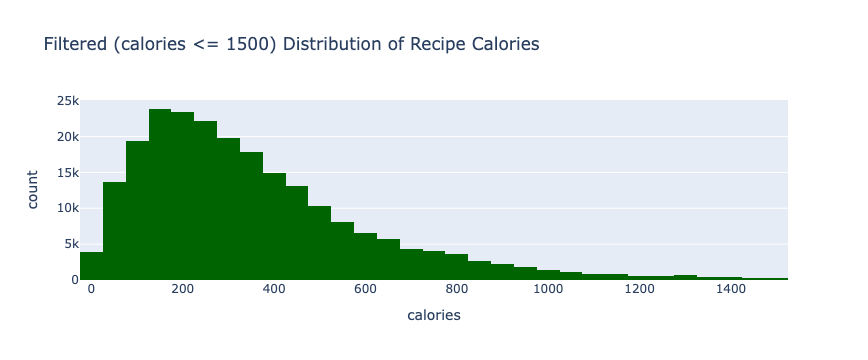

In [19]:
filtered_df = merged_df[merged_df["calories"] <= 1500]
fig = px.histogram(filtered_df, x="calories", nbins=40, title="Filtered (calories <= 1500) Distribution of Recipe Calories", color_discrete_sequence=["darkgreen"] )
fig.show()

In [51]:
# Remove excessive newlines from text fields
for col in ["steps", "description", "review"]:
    merged_df[col] = merged_df[col].astype(str).replace(r'\n', ' ', regex=True)

merged_df.head()


name      id  minutes  contributor_id  \
0  1 brownies in the world    best ever  333281       40          985201   
1    1 in canada chocolate chip cookies  453467       45         1848091   
2                412 broccoli casserole  306168       40           50969   
3                412 broccoli casserole  306168       40           50969   
4                412 broccoli casserole  306168       40           50969   

   submitted                                               tags  n_steps  \
0 2008-10-27  ['60-minutes-or-less', 'time-to-make', 'course...       10   
1 2011-04-11  ['60-minutes-or-less', 'time-to-make', 'cuisin...       12   
2 2008-05-30  ['60-minutes-or-less', 'time-to-make', 'course...        6   
3 2008-05-30  ['60-minutes-or-less', 'time-to-make', 'course...        6   
4 2008-05-30  ['60-minutes-or-less', 'time-to-make', 'course...        6   

                                               steps  \
0  ['heat the oven to 350f and arrange the rack i...   
1  ['pre-heat oven the 350 degrees f', 'in a mixi...   
2  ['preheat oven to 350 degrees', 'spray a 2 qua...   
3  ['preheat oven to 350 degrees', 'spray a 2 qua...   
4  ['preheat oven to 350 degrees', 'spray a 2 qua...   

                                         description  \
0  these are the most; chocolatey, moist, rich, d...   
1  this is the recipe that we use at my school ca...   
2  since there are already 411 recipes for brocco...   
3  since there are already 411 recipes for brocco...   
4  since there are already 411 recipes for brocco...   

                                         ingredients  ...    user_id  \
0  ['bittersweet chocolate', 'unsalted butter', '...  ...   386585.0   
1  ['white sugar', 'brown sugar', 'salt', 'margar...  ...   424680.0   
2  ['frozen broccoli cuts', 'cream of chicken sou...  ...    29782.0   
3  ['frozen broccoli cuts', 'cream of chicken sou...  ...  1196280.0   
4  ['frozen broccoli cuts', 'cream of chicken sou...  ...   768828.0   

   recipe_id       date  rating  \
0   333281.0 2008-11-19     4.0   
1   453467.0 2012-01-26     5.0   
2   306168.0 2008-12-31     5.0   
3   306168.0 2009-04-13     5.0   
4   306168.0 2013-08-02     5.0   

                                              review  average_rating  \
0  These were pretty good, but took forever to ba...             4.0   
1  Originally I was gonna cut the recipe in half ...             5.0   
2  This was one of the best broccoli casseroles t...             5.0   
3  I made this for my son's first birthday party ...             5.0   
4  Loved this.  Be sure to completely thaw the br...             5.0   

   ingredient_complexity  is_missing_rating  time_per_step  \
0                 Simple                  0       3.636364   
1                Complex                  0       3.461538   
2                 Simple                  0       5.714286   
3                 Simple                  0       5.714286   
4                 Simple                  0       5.714286   

   ingredients_per_step  
0              0.818182  
1              0.846154  
2              1.285714  
3              1.285714  
4              1.285714  

[5 rows x 28 columns]

In [52]:
print(merged_df.head().to_markdown(index=False))

| name                                 |     id |   minutes |   contributor_id | submitted           | tags                                                                                                                                                                                                                        |   n_steps | steps                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [22]:
merged_df['protein']

0          3.0
1         13.0
2         22.0
3         22.0
4         22.0
          ... 
234424     6.0
234425     7.0
234426     4.0
234427     4.0
234428     4.0
Name: protein, Length: 234429, dtype: float64

In [23]:
merged_df["minutes"].median()

np.float64(35.0)

In [24]:
merged_df["n_steps"].describe()

count    234429.000000
mean         10.017835
std           6.442265
min           1.000000
25%           6.000000
50%           9.000000
75%          13.000000
max         100.000000
Name: n_steps, dtype: float64

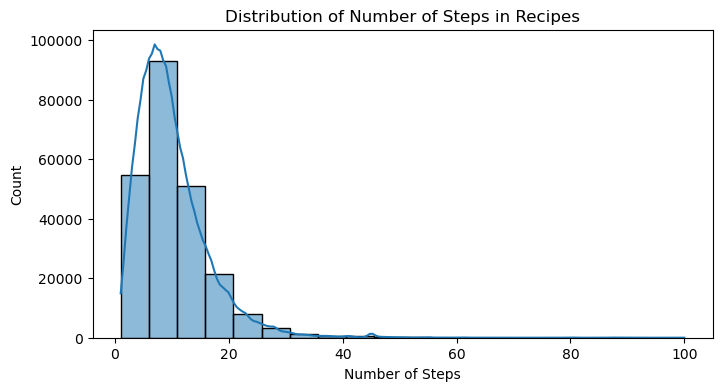

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(merged_df["n_steps"], bins=20, kde=True)
plt.title("Distribution of Number of Steps in Recipes")
plt.xlabel("Number of Steps")
plt.ylabel("Count")
plt.show()

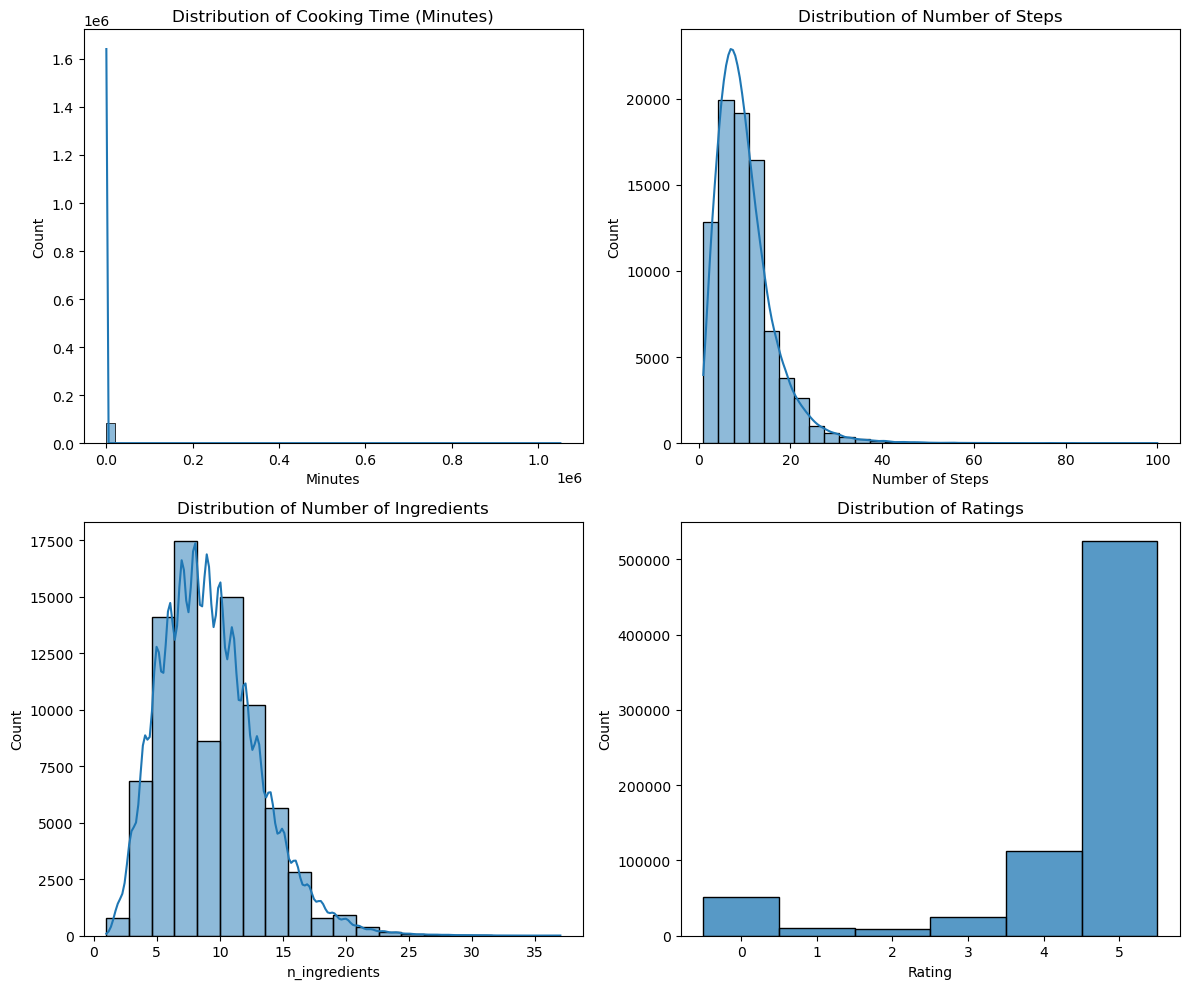

In [91]:
# Univariate Analysis: Plot distributions of relevant columns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribution of cooking time (minutes)
sns.histplot(recipes["minutes"], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Cooking Time (Minutes)")
axes[0, 0].set_xlabel("Minutes")

# Distribution of number of steps
sns.histplot(recipes["n_steps"], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Number of Steps")
axes[0, 1].set_xlabel("Number of Steps")

# Distribution of number of ingredients
sns.histplot(recipes["n_ingredients"], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Number of Ingredients")

# Distribution of ratings
sns.histplot(interactions["rating"], bins=5, discrete=True, kde=False, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Ratings")
axes[1, 1].set_xlabel("Rating")

plt.tight_layout()
plt.show()




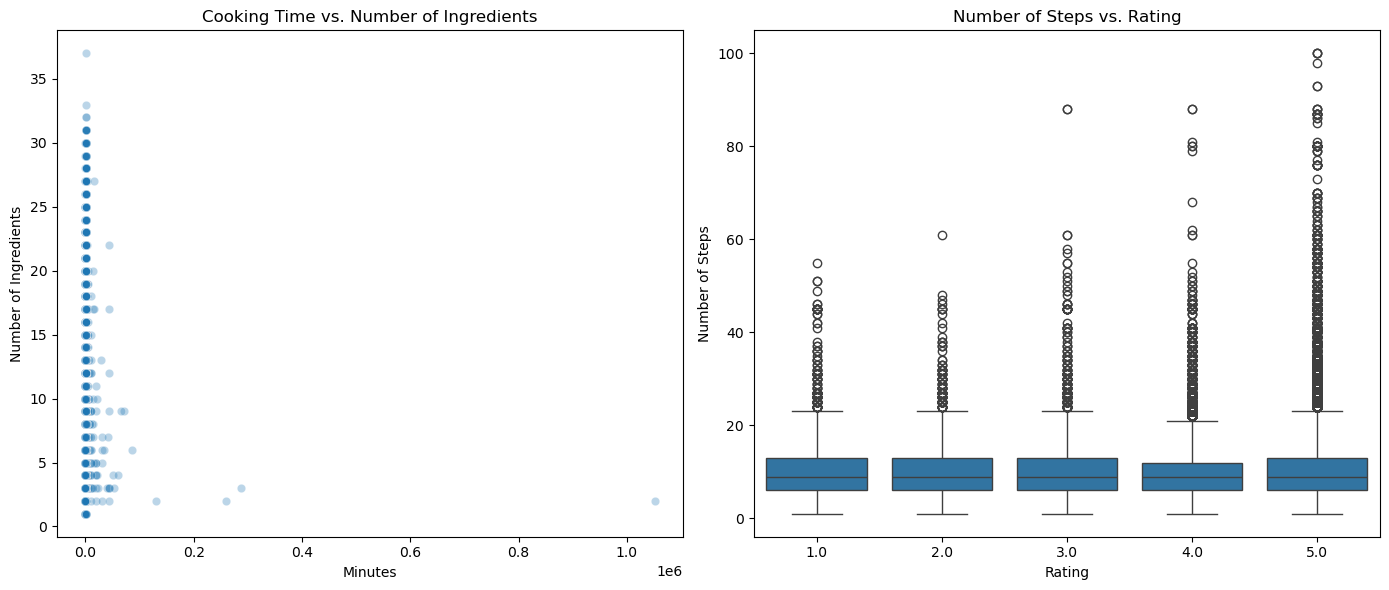

In [54]:
# Bivariate Analysis: Scatter plots and box plots

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot: Cooking time vs. Number of ingredients
sns.scatterplot(x=recipes["minutes"], y=recipes["n_ingredients"], alpha=0.3, ax=axes[0])
axes[0].set_title("Cooking Time vs. Number of Ingredients")
axes[0].set_xlabel("Minutes")
axes[0].set_ylabel("Number of Ingredients")

# Box plot: Number of steps vs. Rating
sns.boxplot(x=merged_df["rating"], y=merged_df["n_steps"], ax=axes[1])
axes[1].set_title("Number of Steps vs. Rating")
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("Number of Steps")


plt.tight_layout()
plt.show()


In [92]:
custom_font = "Times New Roman"
title_font_size = 18
axis_font_size = 14
legend_font_size = 12

fig1 = go.Figure()
fig1.add_trace(go.Histogram(x=recipes["minutes"], nbinsx=50, marker_color="dodgerblue"))
fig1.update_layout(title="Distribution of Cooking Time (Minutes)",
                   xaxis_title="Minutes",
                   yaxis_title="Count",
                   font=dict(family=custom_font, size=axis_font_size),
                   title_font_size=title_font_size,
                   template="plotly_white",
                   annotations=[
                       dict(x=max(recipes["minutes"]), y=5, text="Longer cooking times are less frequent",
                            showarrow=True, arrowhead=2)
                   ])

fig2 = go.Figure()
fig2.add_trace(go.Histogram(x=recipes["n_steps"], nbinsx=30, marker_color="seagreen"))
fig2.update_layout(title="Distribution of Number of Steps",
                   xaxis_title="Number of Steps",
                   yaxis_title="Count",
                   font=dict(family=custom_font, size=axis_font_size),
                   title_font_size=title_font_size,
                   template="plotly_white")

fig3 = go.Figure()
fig3.add_trace(go.Histogram(x=recipes["n_ingredients"], nbinsx=20, marker_color="purple"))
fig3.update_layout(title="Distribution of Number of Ingredients",
                   xaxis_title="Number of Ingredients",
                   yaxis_title="Count",
                   font=dict(family=custom_font, size=axis_font_size),
                   title_font_size=title_font_size,
                   template="plotly_white")

fig4 = go.Figure()
fig4.add_trace(go.Histogram(x=interactions["rating"], nbinsx=5, marker_color="crimson"))
fig4.update_layout(title="Distribution of Ratings",
                   xaxis_title="Rating",
                   yaxis_title="Count",
                   font=dict(family=custom_font, size=axis_font_size),
                   title_font_size=title_font_size,
                   template="plotly_white")

fig5 = px.scatter(recipes, x="minutes", y="n_ingredients", color="n_ingredients",
                  color_continuous_scale="Viridis", title="Cooking Time vs. Number of Ingredients")
fig5.update_layout(xaxis_title="Minutes", yaxis_title="Number of Ingredients",
                   font=dict(family=custom_font, size=axis_font_size),
                   title_font_size=title_font_size, template="plotly_white")

fig6 = px.box(merged_df, x="rating", y="n_steps", color="rating",
              color_discrete_sequence=px.colors.qualitative.Bold, title="Number of Steps vs. Rating")
fig6.update_layout(xaxis_title="Rating", yaxis_title="Number of Steps",
                   font=dict(family=custom_font, size=axis_font_size),
                   title_font_size=title_font_size, template="plotly_white")

# Save the customized HTML files
fig1.write_html("assets/distribution_cooking_time.html", include_plotlyjs='cdn')
fig2.write_html("assets/distribution_n_steps.html", include_plotlyjs='cdn')
fig3.write_html("assets/distribution_n_ingredients.html", include_plotlyjs='cdn')
fig4.write_html("assets/distribution_ratings.html", include_plotlyjs='cdn')
fig5.write_html("assets/cooking_time_vs_ingredients.html", include_plotlyjs='cdn')
fig6.write_html("assets/steps_vs_rating.html", include_plotlyjs='cdn')

html_files = {
    "distribution_cooking_time": "assets/distribution_cooking_time.html",
    "distribution_n_steps": "assets/distribution_n_steps.html",
    "distribution_n_ingredients": "assets/distribution_n_ingredients.html",
    "distribution_ratings": "assets/distribution_ratings.html",
    "cooking_time_vs_ingredients": "assets/cooking_time_vs_ingredients.html",
    "steps_vs_rating": "assets/steps_vs_rating.html",
}


## Step 3: Assessment of Missingness

In [27]:
merged_df['is_missing_rating'] = merged_df['rating'].isnull().astype(int)

In [28]:
merged_df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients',
       'calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat',
       'carbohydrates', 'user_id', 'recipe_id', 'date', 'rating', 'review',
       'average_rating', 'ingredient_complexity', 'is_missing_rating'],
      dtype='object')

In [29]:
missing_values = merged_df.isnull().sum()

In [30]:
missing_data = missing_values[missing_values > 0].sort_values(ascending=False)
missing_data

rating            15036
average_rating     2777
description         114
review               58
name                  1
user_id               1
recipe_id             1
date                  1
dtype: int64

In [31]:
missing_data['description']

np.int64(114)

In [32]:
merged_df['is_missing_rating']

0         0
1         0
2         0
3         0
4         0
         ..
234424    0
234425    0
234426    0
234427    0
234428    1
Name: is_missing_rating, Length: 234429, dtype: int64

In [33]:
from scipy.stats import ks_2samp

In [34]:
def ks_test_missingness(df, test_columns, target_column="description"):
    p_values = {}

    for col in test_columns:
        missing_group = df.loc[df[target_column].isna(), col].dropna()
        not_missing_group = df.loc[~df[target_column].isna(), col].dropna()

        if len(missing_group) > 0 and len(not_missing_group) > 0:
            ks_result = ks_2samp(missing_group, not_missing_group)
            p_values[col] = round(ks_result.pvalue,2)
        else:
            p_values[col] = None

    return pd.Series(p_values)


ks_test_missingness(merged_df, ["ingredient_complexity"])

ingredient_complexity    0.36
dtype: float64

In [35]:
ks_test_missingness(merged_df, ["calories"])

calories    0.01
dtype: float64

In [36]:
# TODO

## Step 4: Hypothesis Testing

**Null**: The average rating of recipes with 9 or fewer ingredients is the same as recipes with more than 9 ingredients. Any observed difference is due to random chance.\
**Alternative**: The average rating of recipes with 9 or fewer ingredients is different from recipes with more than 9 ingredients.


In [38]:
np.random.seed(42) 

In [39]:
n_repetitions = 1000
differences = []

for i in range(n_repetitions):
    with_shuffled = merged_df.assign(Shuffled_Rating=np.random.permutation(merged_df["rating"]))
    
    group_means = (
        with_shuffled
        .groupby("ingredient_complexity")["Shuffled_Rating"]
        .mean()
    )

    difference = group_means.loc["Simple"] - group_means.loc["Complex"]
    differences.append(difference)

mean_ratings = merged_df.groupby("ingredient_complexity")["rating"].mean()
observed_difference = mean_ratings.loc["Simple"] - mean_ratings.loc["Complex"]

p_value = np.mean(np.abs(differences) >= np.abs(observed_difference))

print("Observed Difference in Mean Ratings:", observed_difference)
print("Permutation Test p-value:", p_value)

Observed Difference in Mean Ratings: 0.0036491500705029267
Permutation Test p-value: 0.216


## Step 5: Framing a Prediction Problem

**Prediction problem:** Predict the rating a recipe will receive based on the features extracted from the dataset. This will be a *regression* problem.

## Step 6: Baseline Model

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features = ["minutes", "n_steps", "n_ingredients"]
target = "rating"

# Drop missing values for selected features
merged_df = merged_df.dropna(subset=features + [target])

# Split into training and testing sets
X = merged_df[features]
y = merged_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipeline
baseline_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Standardize numerical features
    ("model", LinearRegression())  # Baseline model: Linear Regression
])

baseline_pipeline.fit(X_train, y_train)

y_pred = baseline_pipeline.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

rmse


np.float64(0.7138650256126987)

## Step 7: Final Model

In [46]:
merged_df['time_per_step'] = merged_df['minutes'] / (merged_df['n_steps'] + 1)
merged_df['ingredients_per_step'] = merged_df['n_ingredients'] / (merged_df['n_steps'] + 1)

/var/folders/fc/0qnlfdcn4_q828xw_slc2zcw0000gn/T/ipykernel_72705/3632944196.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fc/0qnlfdcn4_q828xw_slc2zcw0000gn/T/ipykernel_72705/3632944196.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
features = ["minutes", "time_per_step", "ingredients_per_step","calories"]
target = "rating"

merged_df = merged_df.dropna(subset=features + [target])

X = merged_df[features]
y = merged_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("model", LinearRegression()) 
])

baseline_pipeline.fit(X_train, y_train)

y_pred = baseline_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
rmse

np.float64(0.713825273763129)

In [48]:
merged_df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients',
       'calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat',
       'carbohydrates', 'user_id', 'recipe_id', 'date', 'rating', 'review',
       'average_rating', 'ingredient_complexity', 'is_missing_rating',
       'time_per_step', 'ingredients_per_step'],
      dtype='object')

In [49]:
features = ["time_per_step", "ingredients_per_step", "calories","protein"]
target = "rating"
merged_df = merged_df.dropna(subset=features + [target])
X = merged_df[features]
y = merged_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
baseline_pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("model", LinearRegression()) 
])
baseline_pipeline.fit(X_train, y_train)
y_pred = baseline_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
rmse

np.float64(0.713784814716208)

In [50]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

df = merged_df.copy()
df = df.dropna(subset=["minutes", "n_steps", "n_ingredients", "calories", "protein", "saturated_fat", "carbohydrates", "rating", "review"])

features_final = ["n_steps", "ingredient_complexity", "review"]
target = "average_rating"

X_train, X_test, y_train, y_test = train_test_split(df[features_final], df[target], test_size=0.2, random_state=42)

numerical_features = ["n_steps"]
categorical_features = ["ingredient_complexity"]
text_features = "review"

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features),
    ("text", Pipeline([
        ("tfidf", TfidfVectorizer(stop_words="english", max_features=200))
    ]), text_features)
])

param_grid = {
    "model__n_estimators": [50, 100],  
    "model__max_depth": [10, 20, None]
}

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="r2", n_jobs=-1 )
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)


mse_final = mean_squared_error(y_test, y_pred)
rmse_final = mse_final ** 0.5
print("Final Model RMSE:", rmse_final)
print("Best Hyperparameters:", grid_search.best_params_)

KeyboardInterrupt: 

## Step 8: Fairness Analysis

In [ ]:
# TODO